# Исследование определяющих закономерностей успешности игры. 

Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Открываем файл и изучаем общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Найдем пропуски в таблице и просуммируем по каждому стобцу.

In [3]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В половине столбцов имеются пропуски. Названия столбцов имеют разный регистр. Столбец User_Score имеет тип данных object, хотя должен иметь float64, так как оценки выставляются в виде чисел. Кол-во пропусков оценок пользователей и рейтингов почти совпадают, можно предположить, что здесь есть какая-то связь.

### Подготовка данных. 

#### Приведем названия столбцов к общему виду. 

In [4]:
df.columns = df.columns.str.lower()

#### Изменим тип данных в столбце оценки пользователей

In [5]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Заменим его на Nan, т.к оценка не определена, а остальные оценки переведем в float64. 

In [6]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')

Заменить Nan в столбце оценок пользователей на какое-то конкретное число или среднее мы не можем. В данном случае оценка может быть любой. Замена пропусков может исказить исследование. Оставим их. Так же поступим и с оценками критиков и рейтингом. Так как данных брались из открытых источников, то можно предположить, что функционал у них разный. Где-то вообще может не быть оценок критиков. Некоторые игры могли выйти незаметно и не удостоиться внимания игроков.

А пропуски в названии игр, жанров и годах релизов удалим. Удаление такого количества данных не повлияют на исследрвание. 

In [7]:
df.dropna(subset = ['name'], inplace = True)
df.dropna(subset = ['genre'], inplace = True)
df.dropna(subset = ['year_of_release'], inplace = True)

#### Посчитаем суммарные продажи во всех регионах.

In [8]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Проведем исследовательский анализ данных

#### Посмотрим сколько игр выпускалось в разные годы.

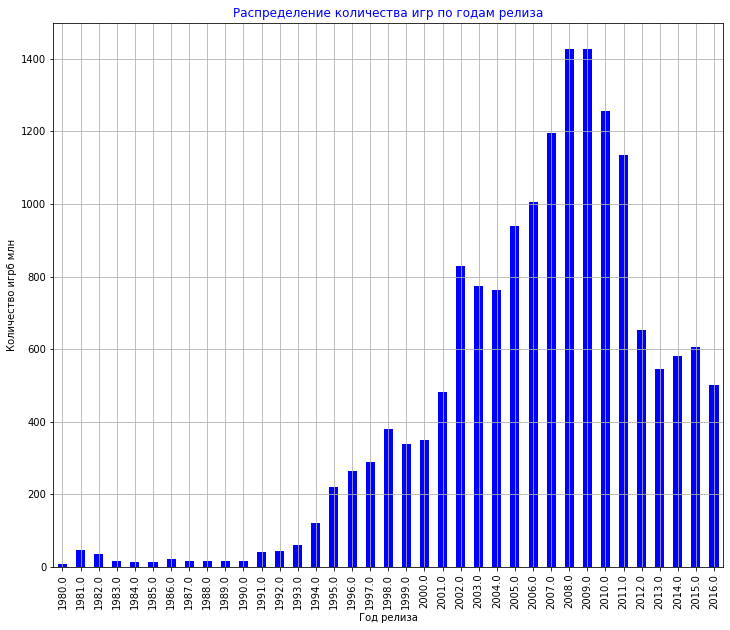

In [9]:
df.pivot_table(index='year_of_release', values=['name'], aggfunc='count') \
   .sort_values(by='year_of_release', ascending=True) \
   .plot(kind='bar',figsize=(12, 10), color='b', grid=True)

plt.title('Распределение количества игр по годам релиза', color='b')
plt.xlabel('Год релиза')
plt.ylabel('Количество игрб млн')
plt.legend().remove()


Всплеск игровой индустрии начался после выхода в 1993 легендарной игры Doom. После этого в 90-е выходили не менее культовые Super Mario 64(1996), Diablo(1996), Final Fantasy(1997). 1998 г был весьма шедр на феноменоальные и прорывные для своего времени шедевры игровой индустрии: Fallout, Half-life, Metal Gear Solid, Star Craft. 
В 2001 выходит сверхуспешная и долгожданная GTA 3. 
До 2008 г игровая индустрии развивалась все сбольше и больше, пока не наступил мировой финансовые кризис, что не могло не повлиять на игровую индустрию. Ко всему этому можно добавить и мобильный гейминг, рост цен на комплектующих для ПК. 

#### Найдем самые популярные платформы. 

In [10]:
top_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(5).reset_index()

top_platforms_dict = top_platforms['platform'].unique()

Построим графики распределения продаж по погдам для топ-5 платформ. 

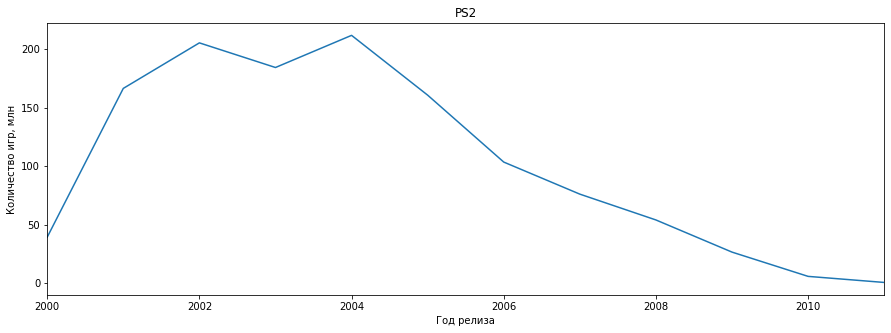

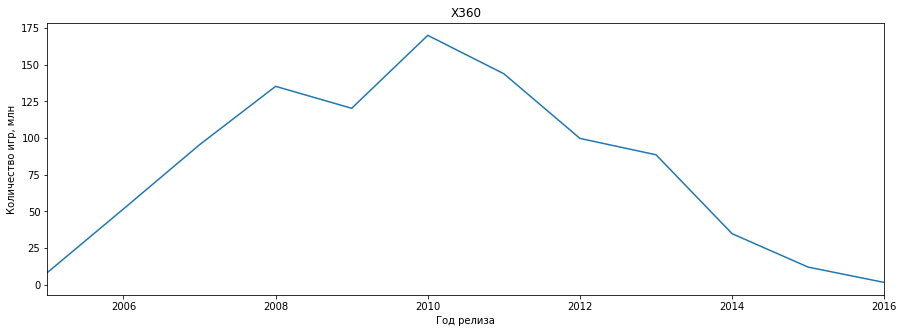

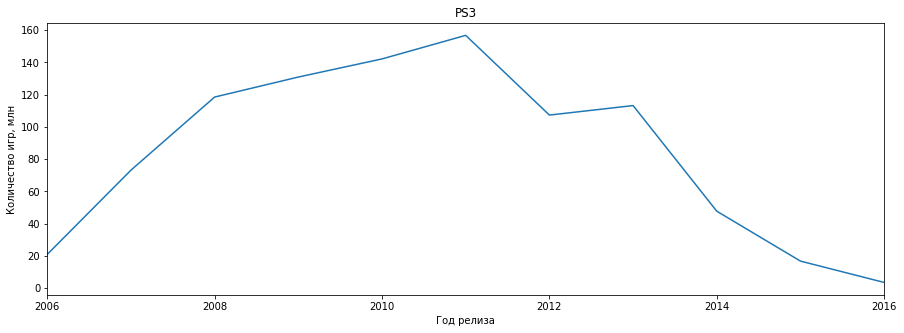

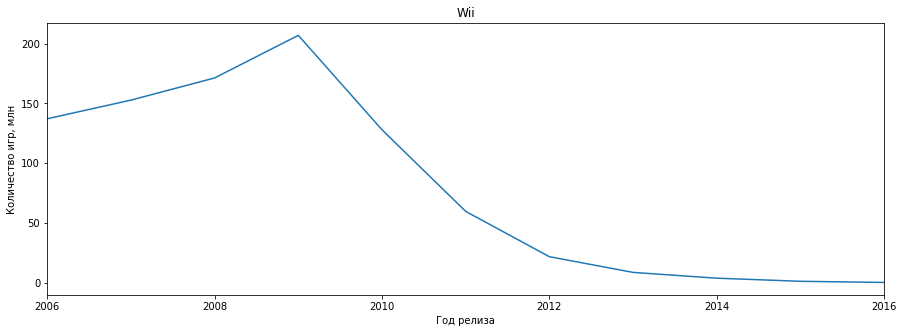

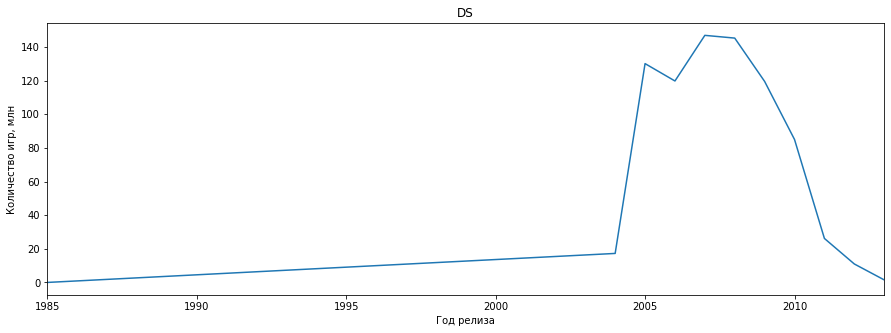

In [11]:
for platform in top_platforms_dict:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(figsize=(15,5))
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Количество игр, млн')
    plt.legend().remove()


Из графиков видно, что платформы живут примерно 5-8 лет. Возьмем 7 лет за характерный срок, за который появляются новые и исчезают старые платформы.

#### Данные за актуальный период. 

Для прогноза на 2017 за актуальный период возмем 2010-2017 гг(из исследований предыдущего вопроса). 

In [12]:
actual_data = df.query('year_of_release > 2010')
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60


#### Топ-5 платформ по продажам за период 2007-2017. 

In [13]:
top_platforms_2017 = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head().reset_index()

top_platforms_2017

,platform,total_sales
0,PS3,445.57
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32


In [14]:
top_platforms_2017_dict = top_platforms_2017['platform'].unique()

Text(0, 0.5, 'Год релиза')

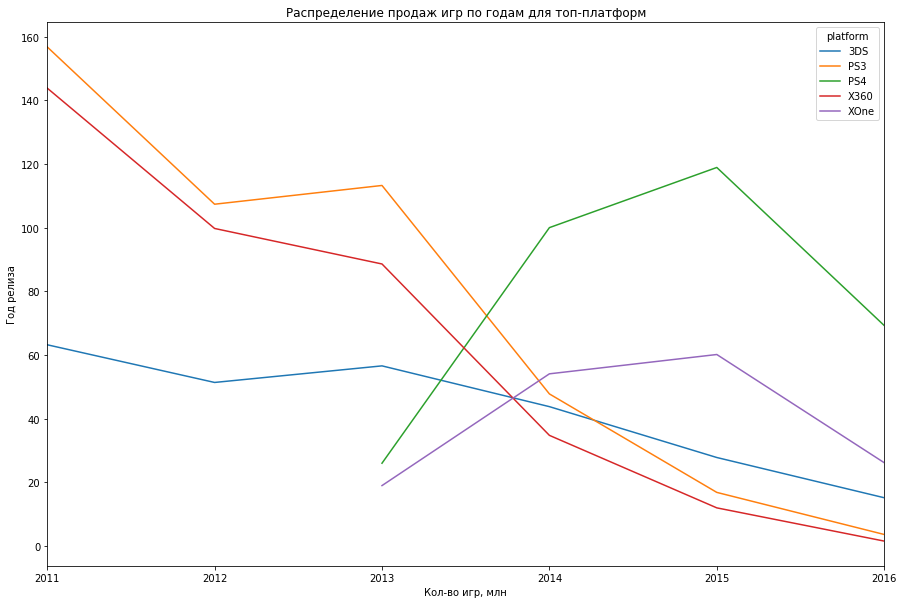

In [15]:
df_2017 = actual_data.query('platform in @top_platforms_2017_dict')

df_2017.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum') \
    .plot(figsize=(15, 10))

plt.title('Распределение продаж игр по годам для топ-платформ')
plt.xlabel('Кол-во игр, млн')
plt.ylabel('Год релиза')


Из графика видно, что на некоторых платформах перестают выпускать игры, судя по количесвту проданных игр. Но есть и перспективные платформы: PS4 и XOne, что обьясняется относительно недавним релизом платформ. 
Платформы X360, PS3 на исходе своего существования. За все время существования под эти платформы было выпущено больше всего игр.
Продажы игр на платформе 3DS падают, но платформа относительно новая и требует более детального исследования. 

#### Построми график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0, 0.5, 'Кол-во проданных игр, млн')

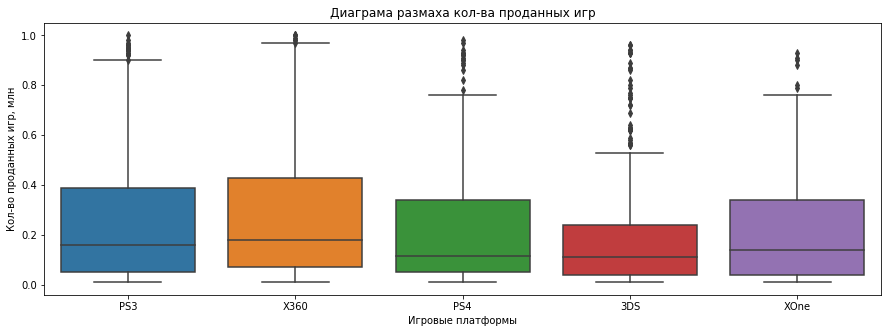

In [16]:
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = df_2017.query('total_sales <= 1'),ax=ax)
plt.title('Диаграма размаха кол-ва проданных игр')
plt.xlabel('Игровые платформы')
plt.ylabel('Кол-во проданных игр, млн')

Из графика видно, что среднее значение проданных игр по медиане больше всего у PS3, X360. Это обьясняется большим количеством проданных игр под эти платформы и кол-вом лет с момента релиза. 

#### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.

##### Возьмем в качестве примера платформу PS3. 

Text(0.5, 0, 'Кол-во проданных игр, млн')

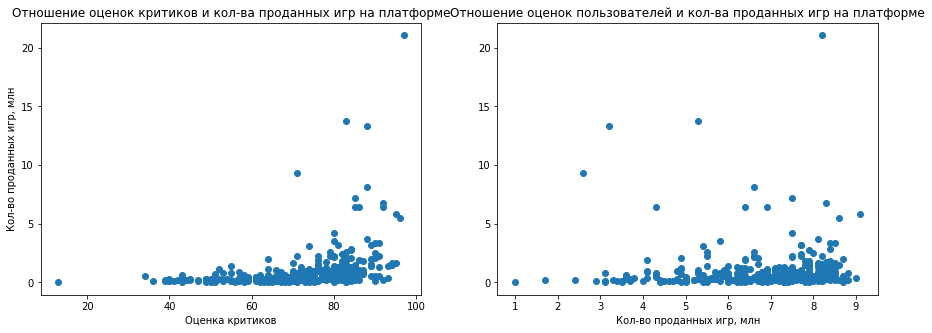

In [17]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.scatter(x = 'critic_score', y = 'total_sales',data = actual_data.query('platform == "PS3"').dropna())
    ax1.set_title('Отношение оценок критиков и кол-ва проданных игр на платформе')
    ax1.set_xlabel('Оценка критиков')
    ax1.set_ylabel('Кол-во проданных игр, млн')

    ax2.scatter(x = 'user_score', y = 'total_sales',data = actual_data.query('platform == "PS3"').dropna())
    ax2.set_title('Отношение оценок пользователей и кол-ва проданных игр на платформе')
    ax2.set_xlabel('Оценка пользователей')
    ax2.set_xlabel('Кол-во проданных игр, млн')

Из графиков видно, что оценки влияют на продажи. Чем выше оценили игру пользователи или критики, тем больше продаж.

Посчитаем корреляцию между отзывами и продажами для PS3. 

In [18]:
ps3_critic_score = actual_data.query('platform == "PS3"')['critic_score']
ps3_user_score = actual_data.query('platform == "PS3"')['user_score']
ps3_total_sales = actual_data.query('platform == "PS3"')['total_sales']

In [19]:
print(ps3_critic_score.corr(ps3_total_sales))
print(ps3_user_score.corr(ps3_total_sales))

0.3801111471829076
0.014089348308019396


##### Посчитаем корреляцию между отзывами и продажами для X360 и построим график.

In [20]:
X360_critic_score = actual_data.query('platform == "X360"')['critic_score']
X360_user_score = actual_data.query('platform == "X360"')['user_score']
X360_total_sales = actual_data.query('platform == "X360"')['total_sales']

print(X360_critic_score.corr(X360_total_sales))
print(X360_user_score.corr(X360_total_sales))

0.3912533245484554
0.0389181707291026


Text(0.5, 0, 'Кол-во проданных игр, млн')

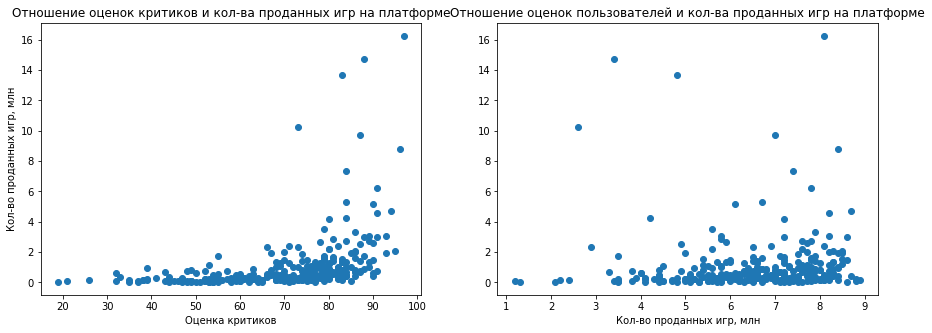

In [21]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.scatter(x = 'critic_score', y = 'total_sales',data = actual_data.query('platform == "X360"').dropna())
    ax1.set_title('Отношение оценок критиков и кол-ва проданных игр на платформе')
    ax1.set_xlabel('Оценка критиков')
    ax1.set_ylabel('Кол-во проданных игр, млн')

    ax2.scatter(x = 'user_score', y = 'total_sales',data = actual_data.query('platform == "X360"').dropna())
    ax2.set_title('Отношение оценок пользователей и кол-ва проданных игр на платформе')
    ax2.set_xlabel('Оценка пользователей')
    ax2.set_xlabel('Кол-во проданных игр, млн')

##### Сделаем расчет для XOne

In [22]:
XOne_critic_score = actual_data.query('platform == "XOne"')['critic_score']
XOne_user_score = actual_data.query('platform == "XOne"')['user_score']
XOne_total_sales = actual_data.query('platform == "XOne"')['total_sales']

print(XOne_critic_score.corr(XOne_total_sales))
print(XOne_user_score.corr(XOne_total_sales))

0.4169983280084017
-0.06892505328279414


Text(0.5, 0, 'Кол-во проданных игр, млн')

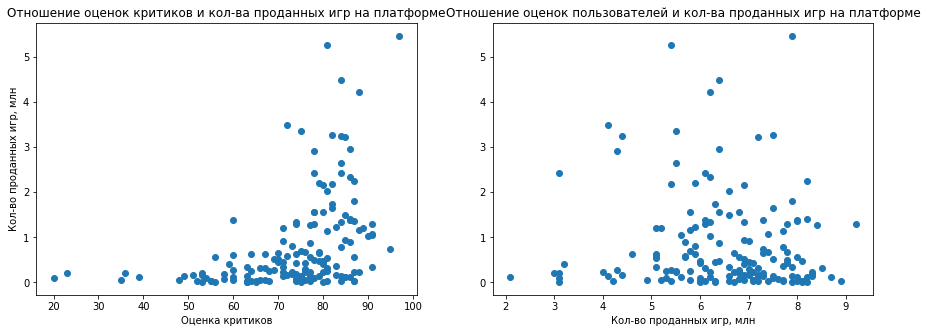

In [23]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.scatter(x = 'critic_score', y = 'total_sales',data = actual_data.query('platform == "XOne"').dropna())
    ax1.set_title('Отношение оценок критиков и кол-ва проданных игр на платформе')
    ax1.set_xlabel('Оценка критиков')
    ax1.set_ylabel('Кол-во проданных игр, млн')

    ax2.scatter(x = 'user_score', y = 'total_sales',data = actual_data.query('platform == "XOne"').dropna())
    ax2.set_title('Отношение оценок пользователей и кол-ва проданных игр на платформе')
    ax2.set_xlabel('Оценка пользователей')
    ax2.set_xlabel('Кол-во проданных игр, млн')

Оценки критиков заметно влияют на решение гймеров покупать игру или нет, в меньшей степени влияют оценки самих игроков. Потенциальные покупатели смотрят на отзывы критиков, и если видят плохой отзыв, то конечно же вероятность купить игру уменьшается. 

#### Общее распределение игр по жанрам. 

In [24]:
top_genre = actual_data.groupby('genre') \
    .agg({'name':'count','total_sales':'sum'}) \
    .sort_values(by='total_sales', ascending=False)
top_genre

,name,total_sales
genre,,
Action,1269,557.80
Shooter,329,402.91
Role-Playing,465,245.63
Sports,389,237.15
Misc,375,139.42
Platform,122,88.68
Racing,180,88.31
Fighting,159,66.90
Simulation,136,50.26


Жанр Action является самым популярным и находится в лидерах и по продажам, и по количеству произведенных игр с большим отрывом по сравнению с остальными жанрами. Следом идут Shooter и Sports по 678.80 и 658.07 млн проданных копий соответственно. А за ними уже Misc и Role-Playing по 487.89 и 465.03. 
Хуже всего продаются жанры в которых надо "думать": Puzzle - 79.18 млн копий и 
Strategy - 68.99 млн, поэту и игр производят в данном жанре в разы меньше по сравнению с популярными жанрами. 

### Портрет пользователя каждого региона(NA, EU, JP).

#### Самые популярные платформы (топ-5).

Топ-5 платформ по количеству проданных игр в Северной Америке.

In [25]:
top_platform_NA = actual_data.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()
top_platform_NA


,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65


Топ-5 платформ по количеству проданных игр в Европе.

In [26]:
top_platform_EU = actual_data.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()
top_platform_EU

,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70


Топ-5 платформ по количеству проданных игр в Японии.

In [27]:
top_platform_JP = actual_data.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()
top_platform_JP

,jp_sales
platform,
3DS,100.62
PS3,49.39
PSP,24.04
PSV,21.84
PS4,15.96


Text(0, 0.5, 'Продажи, млн')

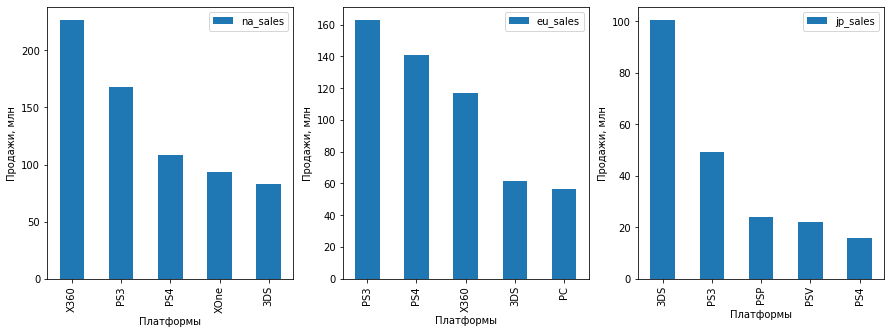

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

top_platform_NA.plot(kind='bar', ax=axes[0])
top_platform_EU.plot(kind='bar', ax=axes[1])
top_platform_JP.plot(kind='bar', ax=axes[2])

axes[0].set_xlabel('Платформы')
axes[0].set_ylabel('Продажи, млн')
axes[1].set_xlabel('Платформы')
axes[1].set_ylabel('Продажи, млн')
axes[2].set_xlabel('Платформы')
axes[2].set_ylabel('Продажи, млн')

В Северной Америке X360 является самой популярной платформой, а в Европе - PS3. Эти платформы вышли в 2005 и 2006 и за это время разработчики игр успели выпустить огромное количество игр, если сравнивать с более новой и мощной PS4(2013). 

Ну а в Японии конечно топ 1 является платформа местного проиводителя Nintendo(DS, 3DS), которую японцы почти на протяжении всей истории поддерживают и покупают. 

#### Самые популярные жанры (топ-5).

Топ-5 жанров по количеству проданных игр в Северной Америке.

In [29]:
top_genre_NA = actual_data.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()
top_genre_NA

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69


Топ-5 жанров по количеству проданных игр в Европе.

In [30]:
top_genre_EU = actual_data.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()
top_genre_EU

,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58


Топ-5 жаноров по количеству проданных игр в Японии.

In [31]:
top_genre_JP = actual_data.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()
top_genre_JP

,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13


Text(0, 0.5, 'Продажи, млн')

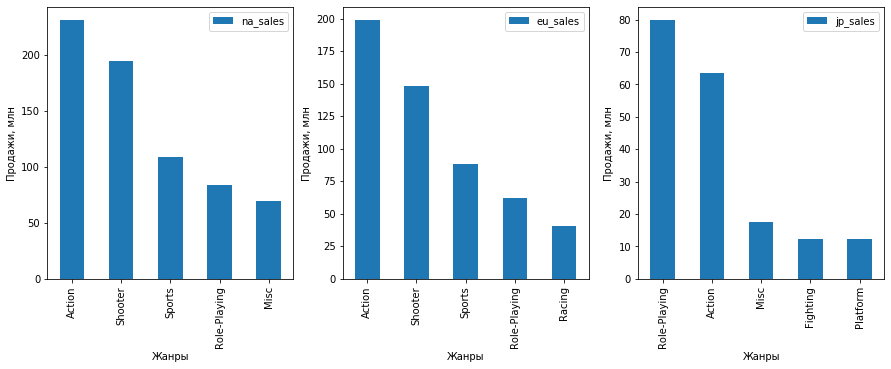

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

top_genre_NA.plot(kind='bar', ax=axes[0])
top_genre_EU.plot(kind='bar', ax=axes[1])
top_genre_JP.plot(kind='bar', ax=axes[2])

axes[0].set_xlabel('Жанры')
axes[0].set_ylabel('Продажи, млн')
axes[1].set_xlabel('Жанры')
axes[1].set_ylabel('Продажи, млн')
axes[2].set_xlabel('Жанры')
axes[2].set_ylabel('Продажи, млн')

В Европе и Северной Америке любят одни и теже игровые жанры: action, shooter, sports. Японский же рынок в этоп плане отличается и больше предпочитает ролевые игры. 

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для лучшей наглядности расшифруем рейтинг ESRB.

In [33]:
esrb_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устар.)', 0: 'без рейтинга'}

In [34]:
actual_data.loc[actual_data['rating'].isna(), 'rating'] = 0

In [35]:
actual_data['esrb_description'] = actual_data[actual_data['rating'].notnull()]['rating'].map(esrb_dict)

In [36]:
esrb = actual_data.pivot_table(index = ['esrb_description'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])

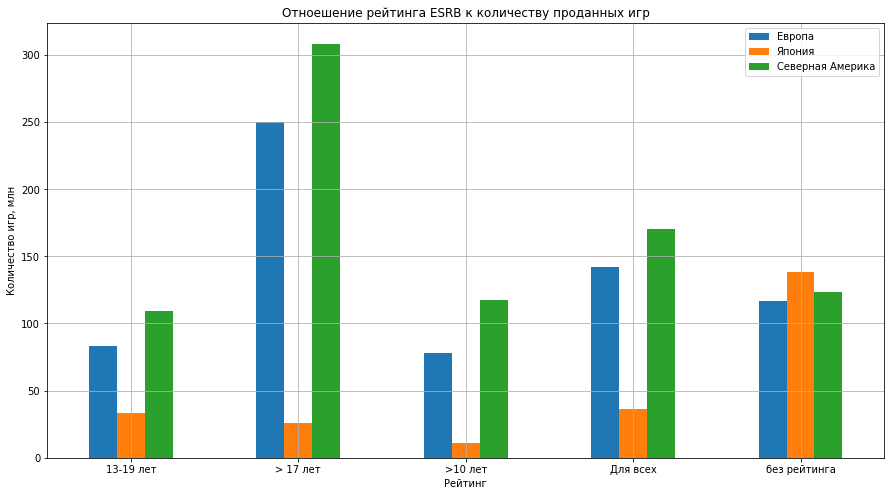

In [37]:
esrb.plot(kind='bar', grid=True, figsize=(15, 8), rot=0)
plt.title('Отноешение рейтинга ESRB к количеству проданных игр')
plt.xlabel('Рейтинг')
plt.ylabel('Количество игр, млн')
plt.legend(['Европа', 'Япония', 'Северная Америка'])

Во всех трех регионах больше всего выпушенных игр имеют жанр 'для всех', что логично, так как такие игры не имеют ограничений и становятся более доступными для всех возрастных категорий. 
В Европе и Северной Америке рынок практически одинаковый, что в очередной раз нам подтверждает соотношение проданных игр к рейтингу ESRB. 
В Японии же рынок отличается. Здесь также больше всего продано в рейтинге 'для всех', но на втором месте  идет категория 13-19 лет.

### Проверка гипотез.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый

H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [38]:
alpha = 0.05

xone = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
pc = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']

results = st.ttest_ind(xone, pc)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


Тест показал подтверждение нулевой гипотезы. Значит можно считать верным, что средние оценки пользователей плтаформы Xbox One  и PC равны. 

In [39]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xone.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc.mean()))


Средняя оценка пользователей игр для платформы Xbox One  - 6.52
Средняя оценка пользователей игр для платформы PC - 6.45


#### Средние пользовательские рейтинги жанров Action и Sports разные.

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый

H1: средний пользовательский рейтинг жанров Action и Sports различается

In [40]:
action_ratings = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
pc_ratings = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']

In [41]:
alpha = 0.05

results = st.ttest_ind(action_ratings, pc_ratings)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.1974550252152054e-24
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Значит считаем, что средние пользовательские рейтинги жанров Action и Sports неравны. 

### Общий вывод. 

Пик игровой индустрии пришелся на 2006-2009 гг. На 2017  г перспективными платформами можно считать PS4 b Xbox One, но и PC нельзя отбрасывать со своим стабильным спросом. РС плтаформу вообще можно отнести в отдельну категорию, так как данная платформа переживет любую другую платформу, за счет агрейда комплектующих, а другие популярные платформы выпускаются в абсолютно полностью новом виде. 
Action, Shooter и Sport являются самыми популярными игровыми жанрами. 
Европейский рынок схож с североамериканским. Здесь популярны одни и те же игровые платформы(PS3, X360) и игровые жанры(Action, Shooter). В отличии от японского рынка. Здесь популярно Nintendo, а самым популярным игровым жанром является Role-Playing. 
Стоит считаться с отзывами критиков, так как их отзывы влияют на популярность той или иной инры. 
Логично что игры без возрастных ограничений являтся самыми популярными. Игры с рейтингом до 10 лет самые невостребованные. Puzzle и Strategy также являются маловостребованными жанрами. 